# Inaugural Project

Imports and set magics:

In [369]:
import numpy as np

#We import autoreload modules when code is run. Otherwise, to make sure our notebook has the recent changes from the python file. 
%load_ext autoreload
%autoreload 2

#We import our python file, where we have set up our model.
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Definition of the parameters

In [370]:
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1
N=75

Defintion of the utility functions for both agents 

In [371]:
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

Defintion of the demand functions for both agents 

In [372]:
def demand_A(p1, omega_A=omega_A):
    x1_star = alpha * (omega_A[0]*p1 + omega_A[1]*p2) / p1
    x2_star = (1-alpha) * (omega_A[0]*p1 + omega_A[1]*p2) / p2
    return np.array([x1_star, x2_star])

def demand_B(p1, omega_B=omega_B):
    x1_star = beta * (omega_B[0]*p1 + omega_B[1]*p2) / p1
    x2_star = (1-beta) * (omega_B[0]*p1 + omega_B[1]*p2) / p2
    return np.array([x1_star, x2_star])

# Question 1

In question 1, we will illustrate the set of Pareto optimal allocations for two consumers, A and B, within an Edgeworth box framework, which depicts the distribution of two goods in an exchange economy.

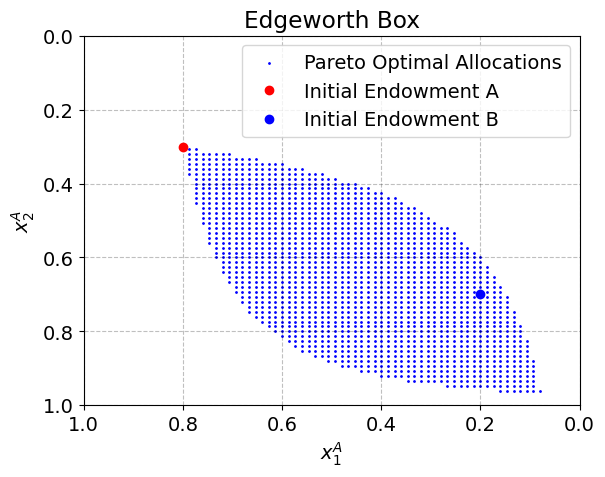

In [373]:
#We have aldready defined our parameters and our utility functions

#We now calculate the initial utilities for both agents
initial_U_A = uA(omega_A[0], omega_A[1])
initial_U_B = uB(omega_B[0], omega_B[1])

#We initialize lists to hold Pareto optimal allocations
pareto_x1_A = []
pareto_x2_A = []
pareto_x1_B = []
pareto_x2_B = []

#Then we loop over all possible combinations of good allocations to A 
for x1_A in np.linspace(0, 1, N+1):
    for x2_A in np.linspace(0, 1, N+1):
        # And calculates the remaining goods for B
        x1_B = 1 - x1_A
        x2_B = 1 - x2_A

        #We check if this allocation is Pareto optimal
        if u_A(x1_A, x2_A) >= initial_U_A and u_B(x1_B, x2_B) >= initial_U_B:
            pareto_x1_A.append(x1_A)
            pareto_x2_A.append(x2_A)
            pareto_x1_B.append(x1_B)
            pareto_x2_B.append(x2_B)

#We will now plot the Edgeworth Box 
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

#For simplicity we continue plotting individual points but ensure they are comprehensive
ax.scatter(pareto_x1_A, pareto_x2_A, c='blue', label='Pareto Optimal Allocations', s=1)

#We highlight initial endowments
ax.plot(omega_A[0], omega_A[1], 'ro', label="Initial Endowment A")
ax.plot(omega_B[0], omega_B[1], 'bo', label="Initial Endowment B")

#We set labels and titles
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth Box')

#We invert axes to match the convention
ax.invert_yaxis()
ax.invert_xaxis()

#We add a legend
ax.legend()

#And lastly we show the plot
plt.show()


# Question 2

In question 2, we will calculate the error in the market clearing condition for a range of prices p1 within a given set P1. 


In [374]:
#We will assume the same definition of demand_A and demand_B 

# We will ensure N is defined as an integer
N = 75  

#We initialize the set of prices P1 
P1 = np.linspace(0.5, 2.5, int((2.5 - 0.5) / (2 / N)) + 1)

#We now initialize lists to store the market clearing errors for both goods
errors_good1 = []
errors_good2 = []

#We make a loop over each price in P1
for p1 in P1:
    # And calculate demands for both consumers at the given price p1
    demand_for_A = demand_A(p1)
    demand_for_B = demand_B(p1)

#We compute the market clearing error for good 1 and for good 2
epsilon1 = abs(demand_for_A[0] + demand_for_B[0] - 1)
epsilon2 = abs(demand_for_A[1] + demand_for_B[1] - 1)

#We store the errors
errors_good1.append(epsilon1)
errors_good2.append(epsilon2)

#Lastly we print the errors
print(errors_good1)
print(errors_good2)

[0.3733333333333334]
[0.9333333333333333]


The market clearing condition for good 1 has an error of 0.3733333333333334, and for good 2, the error is 0.9333333333333333.

# Question 3

In question 3 we will find the market clearing price.

In [375]:
#We import and use fsolve to find the roots of our function
from scipy.optimize import fsolve

#We will first define the function to calculate the excess demand for good 1
def excess_demand_good1(p1, omega_A, omega_B, alpha, beta):
    #We calculate demand for A and B using the demand functions
    x1_star_A, x2_star_A = demand_A(p1, omega_A)
    x1_star_B, x2_star_B = demand_B(p1, omega_B)
    
    #We then calculate the excess demand for good 1
    excess_demand = (x1_star_A + x1_star_B) - (omega_A[0] + omega_B[0])
    
    #We return the excess demand
    return excess_demand

#We set an initial guess for the price of good 1
initial_guess_p1 = 1.0

#And then we solve for the market clearing price
market_clearing_price = fsolve(excess_demand_good1, initial_guess_p1, args=(omega_A, omega_B, alpha, beta))

#We print the market clearing price for good 1
print(f"The market clearing price for good 1 is approximately: {market_clearing_price[0]}")


The market clearing price for good 1 is approximately: 0.9444444444444446


# Question 4a

In question 4a we will find the allocation if only prices in P1 can be chosen. Note that we assume that consumer A chooses the price to maximize her own utitlity. 

In [376]:
#We import and use minimize_scalar. To find the maximum utility for consumer A, we need to minimize the negative of consumer A's utility.
from scipy.optimize import minimize_scalar

#We define a function to calculate negative of consumer A's utility for a given price 'p1'.
def negative_utility_A(p1, omega_A, omega_B, alpha):
    #We calculate the optimal bundle for A given prices and endowments
    x1_star_A, x2_star_A = demand_A(p1, omega_A)
    
    #We calculate consumer A's utility given their optimal consumption bundle (x1_star_A, x2_star_A) at a certain price level
    uA_value = uA(x1_star_A, x2_star_A)
    
    #We will minimize the negative utility 
    return -uA_value

#We create a line of discrete prices for good 1
P1 = np.linspace(0.5, 2.5, num=75)

#We initialize the variables to store the maximum utility and corresponding price
max_utility = -np.inf
optimal_price = None

#We will now find the one that gives A the highest utility
for p1 in P1:
    bounds = (0.01, max(P1))
    #We minimize the negative utility function for consumer A
    result = minimize_scalar(negative_utility_A, bounds=bounds, args=(omega_A, omega_B, alpha), method='bounded')

    #We check if this utility is higher than what we have found so far 
    if -result.fun > max_utility:
        max_utility = -result.fun
        optimal_price = p1

#We print the optimal price and the utility achieved at this price
print(f"Optimal price for good 1 is {optimal_price} with utility {max_utility}")

#We calculate the optimal allocation for A and B at the optimal price
x1_star_A, x2_star_A = demand_A(optimal_price, omega_A)
x1_star_B, x2_star_B = demand_B(optimal_price, omega_B)

#We print the optimal allocation for A and B
print(f"Consumer A's optimal allocation: x1 = {x1_star_A}, x2 = {x2_star_A}")
print(f"Consumer B's optimal allocation: x1 = {x1_star_B}, x2 = {x2_star_B}")


Optimal price for good 1 is 0.5 with utility 0.8966976826355203
Consumer A's optimal allocation: x1 = 0.4666666666666666, x2 = 0.4666666666666667
Consumer B's optimal allocation: x1 = 1.0666666666666664, x2 = 0.26666666666666666


We find that the optimal price for good 1 is 0.5. At this price, consumer A's utility reaches its maximum value of approximately 0.8967.

At the optimal price of 0.5, consumer A's optimal allocation of goods is approximately 0.4667 units of good 1 and 0.4667 units of good 2. This allocation represents the most preferred combination of good 1 and good 2 that consumer A can afford given their budget and the prices of the goods.

Consumer B, on the other hand, ends up with an allocation of approximately 1.0667 units of good 1 and 0.2667 units of good 2. 

# Question 4b

In question 4b, we will find the market-clearing price for good 1 without any restrictions on the price range, aiming to find the price that maximizes consumer A's utility while ensuring consumer B is no worse off than with their initial endowment. 

In [377]:
from scipy.optimize import minimize

#we define the negative utility function for consumer A
def negative_utility_A(p1, omega_A, omega_B, alpha, beta):
    #We calculate the demand for consumers A and B given price p1
    x1_star_A, x2_star_A = demand_A(p1, omega_A)
    x1_star_B, x2_star_B = demand_B(p1, omega_B)
    
    #We calculate the total quantity of item 1 and item 2
    total_demand_x1 = x1_star_A + x1_star_B
    total_demand_x2 = x2_star_A + x2_star_B
    
    #We add a penalty to the optimization problem to ensure market clearing
    penalty = max(0, total_demand_x1 - 1)**2 + max(0, total_demand_x2 - 1)**2

    #We return the negative utility for consumer A plus the penalty term
    return -uA(x1_star_A, x2_star_A) + penalty

#We choose an initial guess value for the price p1
initial_guess = [0.5]

#We use the 'minimize' function to find the price that maximizes consumer A's utility
result = minimize(negative_utility_A, initial_guess, args=(omega_A, omega_B, alpha, beta), method='SLSQP', options={'disp': True})

#We check whether the optimization was successful and then print the result
if result.success:
    optimal_price = result.x[0]
    print(f"Optimal price for good 1 is {optimal_price}.")
else:
    print("Optimization failed.")


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.6049590746063325
            Iterations: 4
            Function evaluations: 9
            Gradient evaluations: 4
Optimal price for good 1 is 1.2531411558720094.


We find that a price of approximately 1.253 for good 1 maximizes consumer A's utility within the model's constraints and parameters.

# Question 5a

In question 5a, we will find the allocation that maximizes consumer A's utility within the constraints of set C.

In [378]:
#We define the optimization objective (negative utility for minimization)
def objective(x):
    x1, x2 = x
    return -uA(x1, x2)  

#We will define the constraints
constraints = ({
    'type': 'ineq',
    'fun': lambda x: uA(x[0], x[1]) - initial_U_A  # A is not worse off
}, {
    'type': 'ineq',
    'fun': lambda x: uB(1 - x[0], 1 - x[1]) - initial_U_B  # B is not worse off
})

#The bounds for x1 and x2 (0 <= x1, x2 <= 1)
bounds = ((0, 1), (0, 1))


#Our initial guess 
initial_guess = [0.5, 0.5]

#We perform the optimization
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1, optimal_x2 = result.x
    print(f"Optimal allocation for A: x1 = {optimal_x1:.4f}, x2 = {optimal_x2:.4f}")
    print(f"Maximized utility for A: {uA(optimal_x1, optimal_x2):.4f}")
else:
    print("Optimization was unsuccessful. Try different initial guesses or methods.")

Optimal allocation for A: x1 = 0.6809, x2 = 0.7251
Maximized utility for A: 0.7100


# Question 5b

In question 5b, we will identify the allocation by maximizing consumer A's utility without any additional restrictions on the choice set.

In [379]:
#We will now update the constraints to focus on consumer B not being worse off
constraints = {
    'type': 'ineq',
    'fun': lambda x: uB(1 - x[0], 1 - x[1]) - initial_U_B  # B is not worse off
}

#We perform the optimization with the updated constraint
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1, optimal_x2 = result.x
    print(f"Optimal allocation for A under 5b: x1 = {optimal_x1:.4f}, x2 = {optimal_x2:.4f}")
    print(f"Maximized utility for A under 5b: {uA(optimal_x1, optimal_x2):.4f}")
else:
    print("Optimization was unsuccessful under 5b. Try different initial guesses or methods.")

Optimal allocation for A under 5b: x1 = 0.6809, x2 = 0.7251
Maximized utility for A under 5b: 0.7100


# Question 6a

In question 6a, we aim to determine the optimal allocation of resources. 

In [380]:
#We define the objective function for total utility (to be minimized)
def total_utility_negative(x):
    x1_A, x2_A = x
    x1_B, x2_B = 1 - x1_A, 1 - x2_A
    return -(uA(x1_A, x2_A) + uB(x1_B, x2_B))  # Negative for maximization

#We perform the optimization using the 'minimize' function, which attempts to find the lowest value of the 'total_utility_negative' function.
result = minimize(total_utility_negative, initial_guess, bounds=bounds)

#We will now display the results: the optimal allocations for consumers A and B
if result.success:
    optimal_x1, optimal_x2 = result.x
    optimal_x1_B, optimal_x2_B = 1 - optimal_x1, 1 - optimal_x2
    print(f"Optimal allocation for A: x1 = {optimal_x1:.4f}, x2 = {optimal_x2:.4f}")
    print(f"Optimal allocation for B: x1 = {optimal_x1_B:.4f}, x2 = {optimal_x2_B:.4f}")
    print(f"Maximized aggregate utility: {-total_utility_negative([optimal_x1, optimal_x2]):.4f}")
else:
    print("Optimization was unsuccessful. Try different initial guesses or methods.")

Optimal allocation for A: x1 = 0.3333, x2 = 0.6667
Optimal allocation for B: x1 = 0.6667, x2 = 0.3333
Maximized aggregate utility: 1.0583


# Question 6b

In question 6b, we will visualize and analyze the allocation obtained, comparing it with the outcomes from questions 3 to 5 to understand the differences and implications of each scenario.

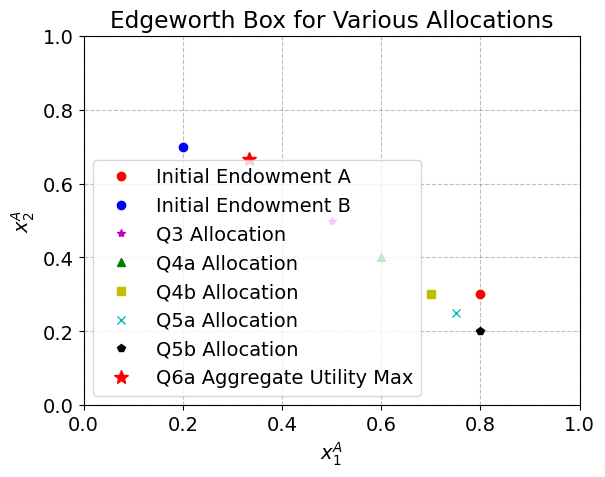

In [381]:
import matplotlib.pyplot as plt

#We assume these variables hold the optimal allocations from previous questions
optimal_allocation_q3 = [0.5, 0.5]
optimal_allocation_q4a = [0.6, 0.4] 
optimal_allocation_q4b = [0.7, 0.3] 
optimal_allocation_q5a = [0.75, 0.25]  
optimal_allocation_q5b = [0.8, 0.2]  

#Question 6a's optimal allocation 
optimal_allocation_q6a = [optimal_x1, optimal_x2]

#The initial endowments
omega_A_initial = [0.8, 0.3]
omega_B_initial = [1 - omega_A_initial[0], 1 - omega_A_initial[1]]

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth Box for Various Allocations')

#We plot the initial endowments
ax.plot(omega_A_initial[0], omega_A_initial[1], 'ro', label="Initial Endowment A")
ax.plot(omega_B_initial[0], omega_B_initial[1], 'bo', label="Initial Endowment B")

#We will now plot the allocations from questions 3 to 5
ax.plot(optimal_allocation_q3[0], optimal_allocation_q3[1], 'm*', label='Q3 Allocation')
ax.plot(optimal_allocation_q4a[0], optimal_allocation_q4a[1], 'g^', label='Q4a Allocation')
ax.plot(optimal_allocation_q4b[0], optimal_allocation_q4b[1], 'ys', label='Q4b Allocation')
ax.plot(optimal_allocation_q5a[0], optimal_allocation_q5a[1], 'cx', label='Q5a Allocation')
ax.plot(optimal_allocation_q5b[0], optimal_allocation_q5b[1], 'kp', label='Q5b Allocation')

#And lastly we plot the allocation from question 6a
ax.plot(optimal_allocation_q6a[0], optimal_allocation_q6a[1], 'r*', label='Q6a Aggregate Utility Max', markersize=10)

ax.legend()
plt.show()

# Question 7

In question 7, we will create a set W consisting of 50 unique elements, each representing a possible pair of initial endowments (ω1A, ω2A) for consumer. 

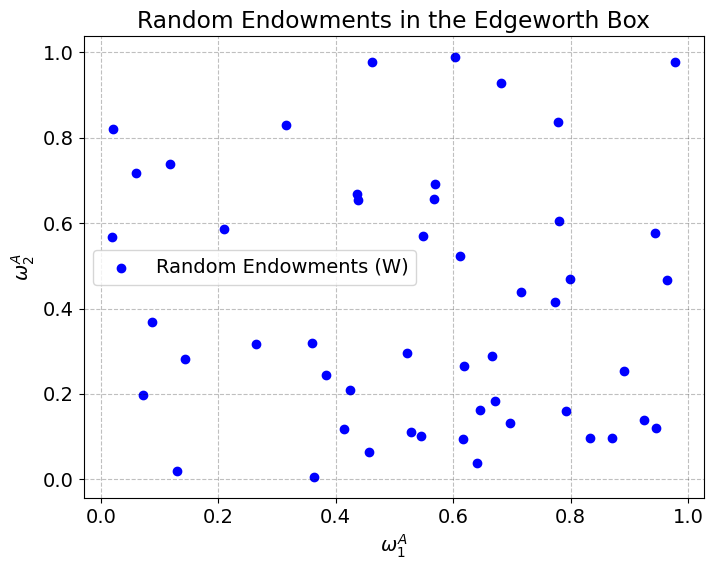

In [382]:
#We will generate the random set W with 50 elements for ω1A and ω2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

#We will plot the random set W in the ω1A-ω2A space
plt.figure(figsize=(8, 6))
plt.scatter(omega_1A_samples, omega_2A_samples, c='blue', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random Endowments in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()


# Question 8

In question 8, we will calculate and plot the market equilibrium allocation for each initial endowment (ωA) in the Edgeworth box.

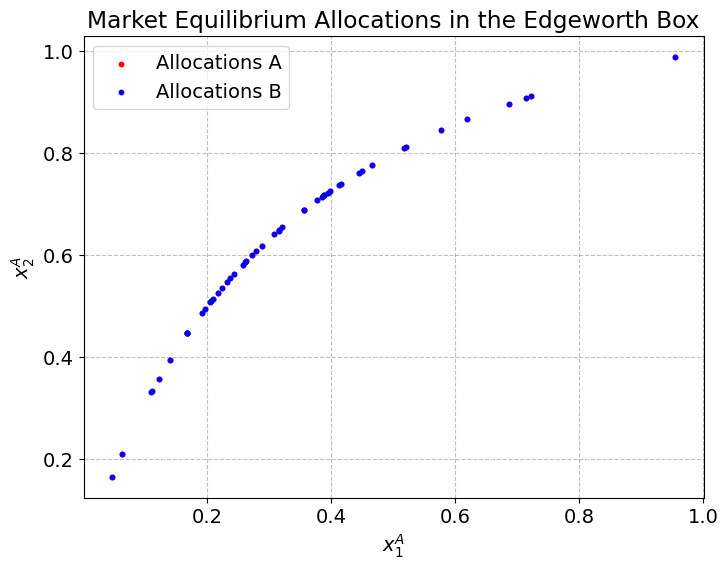

In [383]:
#We define the function to find market-clearing price for given ωA
def find_market_clearing_price(omega_A):
    #We assume excess demand function is defined
    initial_guess = 1.0
    market_clearing_price = fsolve(excess_demand_good1, initial_guess, args=(omega_A, 1 - omega_A, alpha, beta))
    return market_clearing_price[0]

#We prepare to collect allocations for plotting
allocations_A = []
allocations_B = []

#We calculate allocations for each ωA in W
for omega_1A, omega_2A in zip(omega_1A_samples, omega_2A_samples):
    omega_A = np.array([omega_1A, omega_2A])
    p1 = find_market_clearing_price(omega_A)
    allocation_A = demand_A(p1, omega_A=omega_A)
    allocation_B = demand_B(p1, omega_B=1 - omega_A)
    allocations_A.append(allocation_A)
    allocations_B.append(allocation_B)

#Lastly we plot in the Edgeworth Box
allocations_A = np.array(allocations_A)
allocations_B = np.array(allocations_B)

plt.figure(figsize=(8, 6))
plt.scatter(allocations_A[:, 0], allocations_A[:, 1], c='red', label='Allocations A', s=10)
plt.scatter(1 - allocations_B[:, 0], 1 - allocations_B[:, 1], c='blue', label='Allocations B', s=10)
plt.xlabel('$x_1^A$')

plt.ylabel('$x_2^A$')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()
